In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Practice 1
### Purpose:
   1. To practice the basic usage of numpy and matplotlib.
   2. To understand the concept of mean and standard deviation.
    
### Task:
 Generate an 1-d array with several elements, each element is sampled from a statistical population with a normal distribution with mean = 0 and standard deviation = 3.
 Plot the data points and mark the mean and standard deviation calculated from the data.
 Will the mean and standard deviation be the same as the population?
 State the reason.

### Hint:
   1. Use np.random.normal to generate the data.
   2. Visualize the data points with plt.scatter, plt.axvline, plt.hist, plt.plot, etc.
   3. Calculate the mean and standard deviation with np.mean and np.std or function defined by yourself.
         Be aware of the n or n-1 in the denominator used to calculate the standard deviation.

Calculated mean: 0.17776112956991455
Calculated standard deviation: 3.445138027366479


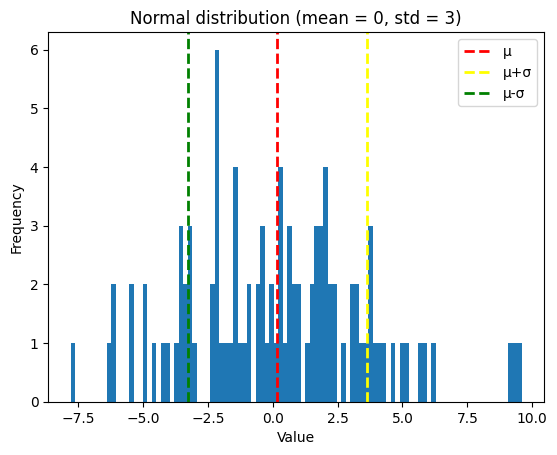

In [20]:
class Data:
    def __init__(self, mean, stdev, shape):
        # Generate an array, loc = mean, scale = standard deviation, size = shape (size of the c)
        self.elements = np.random.normal(loc=mean, scale=stdev, size=shape)
        # Calculate the mean and standard deviation from numpy
        self.mean = np.mean(self.elements) # Mean
        self.stdev = np.std(self.elements) # Standard deviation

    def plot(self):
        # Plotting the histogram of the data
        plt.hist(self.elements, bins=100)
        plt.axvline(self.mean, color='red', linestyle='dashed', linewidth=2, label="μ") # Marking the mean with a red dashed line
        plt.axvline(self.mean + self.stdev, color='yellow', linestyle='dashed', linewidth=2, label="μ+σ") # Marking the 1 std dev right with a yellow dashed line
        plt.axvline(self.mean - self.stdev, color='green', linestyle='dashed', linewidth=2, label="μ-σ") # Marking the 1 std dev left with a green dashed line
        plt.title('Normal distribution (mean = 0, std = 3)') # Title of the plot
        plt.xlabel('Value') # X-axis label
        plt.ylabel('Frequency') # Y-axis label
        plt.legend() 
        plt.show()

# Create an instance of Data
data_instance = Data(mean=0, stdev=3, shape=100)

# Print the calculated mean and standard deviation from numpy
print("Calculated mean:", data_instance.mean)
print("Calculated standard deviation:", data_instance.stdev)

# Plot the data
data_instance.plot()

### Results:
Keep in mind the output is generated randomly, so the values might differ from the ones shown here.
#### First Output:
```
Calculated mean: 0.057014426189852266
Calculated standard deviation: 3.3579096729795235
```
![Chapter 1 Practice 1 Output 1](./pictures/ch1-practice1-output1.png)

#### Second Output:
```
Calculated mean: 0.013686474266731263
Calculated standard deviation: 3.116177575022896
```
![Chapter 1 Practice 1 Output 2](./pictures/ch1-practice1-output2.png)

#### Result Explanation
Overall, the calculated mean and standard deviation from numpy show that the random array generated by `numpy.random.normal()` is not as perfect as it should be, as there are still minor deviations of the actual mean and standard deviations compared to the mean and standard deviations given to the numpy function. This code I have created also charts a histogram using Matlibplot and marks out the calculated mean and standard deviations. This creates an easy visualization for the users to see how the generated values are spread out. Other than that, while the deviations of the mean and standard deviations compared to the set parameters are random, the amount of the deviation shows a trend that the bigger the generated array, the smaller the deviations are to the set and actual mean and standard deviations. However, further research and testing are required to see if the phenomenon is just a correlation or a case of causation.

### Debug Log
#### First Error:
```
Traceback (most recent call last):
  File "/home/hyperhypa/extra/NSYSU/fourth semster/Advance Lab/Exp1/ch1-practice.py", line 47, in <module>
    print("Calculated mean:", Data.mean)
                              ^^^^^^^^^
AttributeError: type object 'Data' has no attribute 'mean'
```
This error is caused by the fact that I forgot to add create an instance of the class "Data" after converting my code to a class. I ended up creating an instance and named it "data_instance" with this line of code `data_instance = Data(loc=0, scale=3, size=1000)` in line 22.
#### Second Error:
```
/home/hyperhypa/extra/NSYSU/fourth semster/Advance Lab/Exp1/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hyperhypa/extra/NSYSU/fourth semster/Advance Lab/Exp1/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/hyperhypa/extra/NSYSU/fourth semster/Advance Lab/Exp1/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:223: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/hyperhypa/extra/NSYSU/fourth semster/Advance Lab/Exp1/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:181: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/hyperhypa/extra/NSYSU/fourth semster/Advance Lab/Exp1/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:215: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
```
This error is caused by the fact that I accidentally set the shape of the array to (100,0) instead of (100) or (100,1). I changed the shape of the array to (100) in line 22 to solve this error. When `shape=100` and `shape=(100,1)`, it will generate an array with 100 elements, which is what I want. There are minor differences such that the former creates an 1d array[100], while the latter creates an (semi) 2d array[100][1], but both work. However, `shape=(100,0)` generates an empty array[100,0], which will cause the error.

# Practice 2
### Purpose:
1. To be familiar with the usage of conditional statements, for loop, and indexing.
2. Be able to check the correctness of the coding process by visualization.

### Task:
Generate an 1-d array with 50 elements, each element is sampled from a statistical population with a normal distribution with mean = 0 and standard deviation = 3. Pick up the data points that are within 1 standard deviation from the mean.(mean-std < data < mean+std) Plot the picked data points and original data points to check if the filtering process is correct. Mark the mean-stdev and mean+stdev on the plot might be helpful. Print all the index of the data points that are picked.(These index might range from 0 to 49)

### Hint:
1. Use a for loop to iterate through the data points.
2. Use an if statement to filter out the data points.
3. Add additional lists to store the information(index, value....) needed in the filtering process if needed.(list.append, list.index, list.pop, etc.)

Calculated mean: -0.4039694423148388
Calculated standard deviation: 2.8213083582195178
Index of the picked data points: [np.float64(-0.9579978223121932), np.float64(-0.9248026997845317), np.float64(1.5781935298771743), np.float64(0.21310045057064664), np.float64(0.24498743350710034), np.float64(-0.7777123639652042), np.float64(-2.249070624315953), np.float64(-2.115452114437871), np.float64(2.189408933656673), np.float64(2.192284984212105), np.float64(-1.2839837052602643), np.float64(-3.1031559547596403), np.float64(-1.5084096567928245), np.float64(-0.37771394687171167), np.float64(-0.9812675560928539), np.float64(-3.09166091526827), np.float64(1.82734171580047), np.float64(-0.8936504162046566), np.float64(-2.0551104275224814), np.float64(1.3606648336275478), np.float64(-0.12234816212091655), np.float64(-0.018923869534385365), np.float64(0.9332747702154258), np.float64(1.3248741999146678), np.float64(0.873255622554996), np.float64(-0.9144647933974889), np.float64(-0.23739427717960768), 

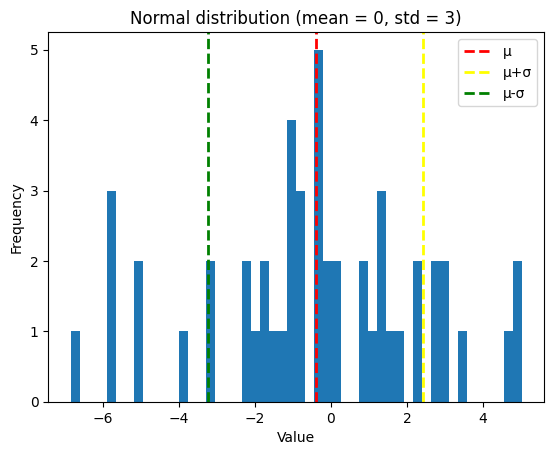

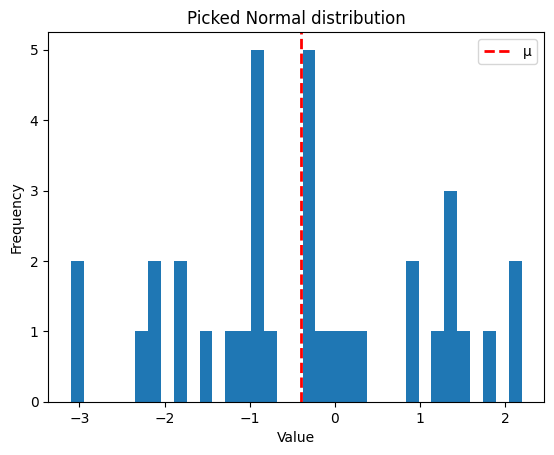

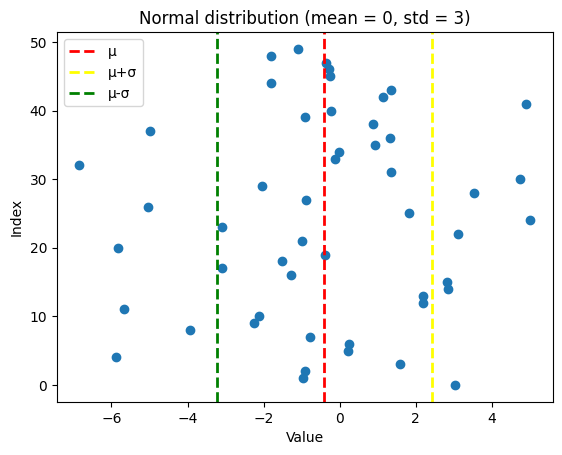

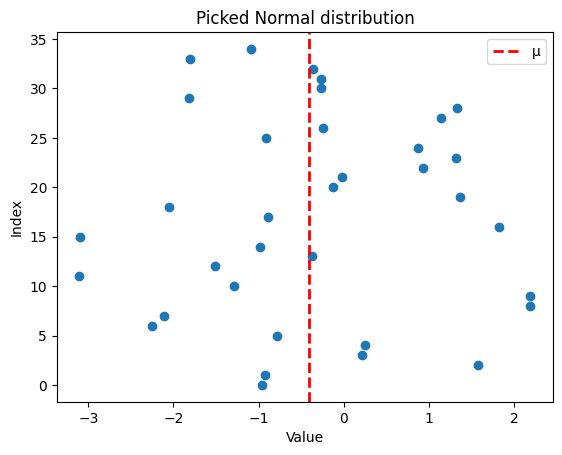

In [3]:
class Data:
    def __init__(self, mean, stdev, shape):
        # Generate an array, loc = mean, scale = standard deviation, size = shape (size of the array)
        self.elements = np.random.normal(loc=mean, scale=stdev, size=shape)
        # Calculate the mean and standard deviation from numpy
        self.mean = np.mean(self.elements) # Mean
        self.stdev = np.std(self.elements) # Standard deviation
        self.picked_elements = self.filter() # An Array that stores the picked elements

    def plot(self):
        # Plotting the histogram of the original data
        plt.hist(self.elements, bins=len(self.elements))
        plt.axvline(self.mean, color='red', linestyle='dashed', linewidth=2, label="μ") # Marking the mean with a red dashed line
        plt.axvline(self.mean + self.stdev, color='yellow', linestyle='dashed', linewidth=2, label="μ+σ") # Marking the 1 std dev right with a yellow dashed line
        plt.axvline(self.mean - self.stdev, color='green', linestyle='dashed', linewidth=2, label="μ-σ") # Marking the 1 std dev left with a green dashed line
        plt.title('Normal distribution (mean = 0, std = 3)') # Title of the plot
        plt.xlabel('Value') # X-axis label
        plt.ylabel('Frequency') # Y-axis label
        plt.legend() 
        plt.show()
    
    def plot_picked(self):
        # Plotting the histogram of the picked data
        plt.hist(self.picked_elements, bins=len(self.picked_elements))
        plt.axvline(self.mean, color='red', linestyle='dashed', linewidth=2, label="μ") # Marking the mean with a red dashed line
        plt.title('Picked Normal distribution') # Title of the plot
        plt.xlabel('Value') # X-axis label
        plt.ylabel('Frequency') # Y-axis label
        plt.legend() 
        plt.show()
    
    def plot_scatter(self):
        # Plotting the scatter chart of the original data
        plt.scatter(self.elements, np.arange(len(self.elements)))
        plt.axvline(self.mean, color='red', linestyle='dashed', linewidth=2, label="μ") # Marking the mean with a red dashed line
        plt.axvline(self.mean + self.stdev, color='yellow', linestyle='dashed', linewidth=2, label="μ+σ") # Marking the 1 std dev right with a yellow dashed line
        plt.axvline(self.mean - self.stdev, color='green', linestyle='dashed', linewidth=2, label="μ-σ") # Marking the 1 std dev left with a green dashed line
        plt.title('Normal distribution (mean = 0, std = 3)') # Title of the plot
        plt.xlabel('Value') # X-axis label
        plt.ylabel('Index') # Y-axis label
        plt.legend()
        plt.show()
    
    def plot_picked_scatter(self):
        # Plotting the scatter chart of the picked data
        plt.scatter(self.picked_elements, np.arange(len(self.picked_elements)))
        plt.axvline(self.mean, color='red', linestyle='dashed', linewidth=2, label="μ") # Marking the mean with a red dashed line
        plt.title('Picked Normal distribution') # Title of the plot
        plt.xlabel('Value') # X-axis label
        plt.ylabel('Index') # Y-axis label
        plt.legend()
        plt.show()
    
    def filter(self):
        # Create an array with the elements that are within 1 standard deviation from the mean
        self.picked_elements = []
        for i in range(len(self.elements)):
            if self.mean - self.stdev < self.elements[i] < self.mean + self.stdev:
                self.picked_elements.append(self.elements[i])
        return self.picked_elements

# Create an instance of Data
data_instance = Data(mean=0, stdev=3, shape=50)

# Print the calculated mean and standard deviation from numpy
print("Calculated mean:", data_instance.mean)
print("Calculated standard deviation:", data_instance.stdev)

# Print the index of the picked data points
print("Index of the picked data points:", data_instance.picked_elements)

# Plot the data
data_instance.plot() # the histogram of the original data
data_instance.plot_picked() # Plotting the histogram of the picked data
data_instance.plot_scatter() # Plotting the scatter chart of the original data
data_instance.plot_picked_scatter() # Plotting the scatter chart of the picked data

### Result
Keep in mind the output is generated randomly, so the values might differ from the ones shown here.
#### First Output
```
Calculated mean: 0.48589960445099467
Calculated standard deviation: 3.26489267795392
```
![Chapter 1 Practice 2 Output 1-1](./pictures/ch1-practice2-output1-1.png)
![Chapter 1 Practice 2 Output 1-2](./pictures/ch1-practice2-output1-2.png)
![Chapter 1 Practice 2 Output 1-3](./pictures/ch1-practice2-output1-3.png)
![Chapter 1 Practice 2 Output 1-4](./pictures/ch1-practice2-output1-4.png)

#### Second Output
```
Calculated mean: 0.4046694807661301
Calculated standard deviation: 2.7859903883967374
```
![Chapter 1 Practice 2 Output 2-1](./pictures/ch1-practice2-output2-1.png)
![Chapter 1 Practice 2 Output 2-2](./pictures/ch1-practice2-output2-2.png)
![Chapter 1 Practice 2 Output 2-3](./pictures/ch1-practice2-output2-3.png)
![Chapter 1 Practice 2 Output 2-4](./pictures/ch1-practice2-output2-4.png)

#### Result Explanation
This code is based on the code for practice one, so everything said for it also applies to this extra modified code; this should explain why the deviation from the calculated and set parameters of the mean and standard deviation are notably more noticeable since the set requirement of 50 elements is quite low. The first two charts shown in each set of the output display the histogram of the generated 1-d array with 50 elements and the filtered 1-d array where data points are within one standard deviation from the mean. The third and fourth charts are scatter charts depicting each of the 50 data points generated by `np.random.normal` and the filter data points within one standard deviation from the mean. These two charts should indicate that the filter method inside the class "Data" is working correctly. Besides that, this code is quite modular, so feel free to change the parameters of the generated 1-d array in line 63.

### Debug Log
#### First Error:
```
TypeError                                 Traceback (most recent call last)
Cell In[13], line 44
     42 # Plot the data
     43 data_instance.plot()
---> 44 data_instance.plot_picked()    

Cell In[13], line 22, in Data.plot_picked(self)
     20 def plot_picked(self):
     21     # Plotting the histogram of the picked data
---> 22     plt.hist(self.picked_elements, bins=100)
     23     plt.axvline(self.mean, color='red', linestyle='dashed', linewidth=2, label="μ") # Marking the mean with a red dashed line
     24     plt.title('Picked Normal distribution (mean = 0, std = 3)') # Title of the plot

TypeError: object of type 'NoneType' has no len()
```
This because I forgot to return the array `self.picked_elements` in the filter function, so the data wouldn't be stored properly. I added `return self.picked_elements` in line 60.

#### Second Error:
```
/tmp/ipykernel_13948/607424263.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()

/tmp/ipykernel_13948/607424263.py:39: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
```
I forgot to remove the `plt.legend()` in the method `plot_scatter` and `plot_picked_scatter` when I also removed`plt.axvline` that each included `label` arguments. I removed `plt.legend()` to solve this warning. I ended up adding `plt.legend()` back when I added the `axvline`, `plt.xlabel`, and `plt.ylabel` function when reworking how the plots are displayed.

### Summary of This Week:
For the practices of Chapter One, it felt more like one assignment with multiple smaller parts to build upon and piece together, so I decided to use OOPs (Object-Oriented Programming) concepts in Python. This made reusing the code quite easy, and if this code is needed in the future, it should be easy to add new functions to it. This served as a good warm-up practice for creating a class while reviewing the use cases of "for loops", numpy, lists, and Matplotlib in Python. For some people who believe creating four different methods for each plot might be excess, I can partially agree. However, personally, I think that not merging them into two or even one different method should help with the readable by a lot.